# Baseline - Train and Save Best Case

## Set Up

In [1]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import json
from scipy.sparse import load_npz

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
PATH = Path.cwd().parents[1]
DATA_PATH = os.path.join(PATH, 'data/processed')
SAVE_PATH = os.path.join(PATH, 'models/baseline')

## Best Binary Model by Class

### Mint - Source Code (TF-IDF)

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
FEATURE_PATH = os.path.join(DATA_PATH, 'tf_idf')

#### Load Data

In [5]:
X = load_npz(os.path.join(FEATURE_PATH, "tfidf_vector_sol.npz"))
y = np.load(os.path.join(FEATURE_PATH, "labels_sol.npy"))
y = y[:, 0]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

#### Train Model

In [6]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

#### Evaluate Model

In [7]:
y_pred = model.predict(X_val)

In [8]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.60      1.00      0.75         3

    accuracy                           0.86        14
   macro avg       0.80      0.91      0.82        14
weighted avg       0.91      0.86      0.87        14



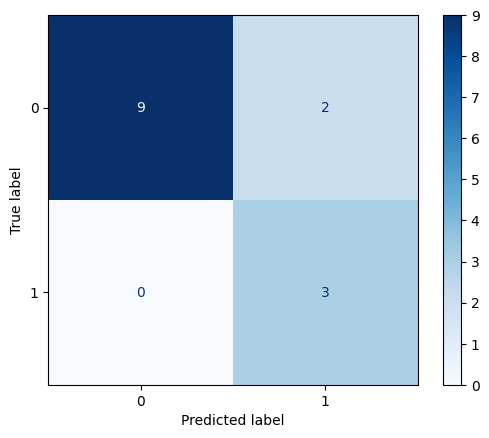

In [9]:
cm = confusion_matrix(y_val, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

In [10]:
score = f1_score(y_val, y_pred, average='macro')
with open(os.path.join(SAVE_PATH, fr"mint-model-f1-{score:2f}.pkl"), "wb") as fout:
    pickle.dump(model, fout)
print(f"Saved mint-model.pkl")

Saved mint-model.pkl


### Leak - Byte Frequency

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
FEATURE_PATH = os.path.join(DATA_PATH, 'byte_freq')

#### Load Data

In [13]:
df = pd.read_csv(os.path.join(FEATURE_PATH, 'dataset.csv')).set_index('address')

with open(os.path.join(FEATURE_PATH, 'features.json'), "r") as f:
    features = json.load(f)

with open(os.path.join(FEATURE_PATH, 'labels.json'), "r") as f:
    labels = json.load(f)

In [14]:
X = df[features]
y = df[['leak']]

In [15]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

#### Train Model

In [16]:
model = GaussianNB()
model.fit(X_train, y_train)

/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

#### Evaluate Model

In [17]:
y_pred = model.predict(X_val)

In [18]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.67      0.80         3

    accuracy                           0.93        14
   macro avg       0.96      0.83      0.88        14
weighted avg       0.93      0.93      0.92        14



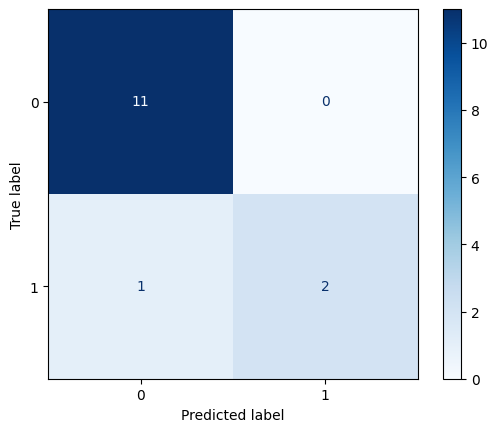

In [19]:
cm = confusion_matrix(y_val, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

In [20]:
score = f1_score(y_val, y_pred, average='macro')
with open(os.path.join(SAVE_PATH, fr"leak-model-f1-{score:2f}.pkl"), "wb") as fout:
    pickle.dump(model, fout)
print(f"Saved leak-model.pkl")

Saved leak-model.pkl


### Limit - Opcode N Grams - Gigahorse

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
FEATURE_PATH = os.path.join(DATA_PATH, 'ir_gigahorse')

#### Load Data

In [23]:
df = pd.read_csv(os.path.join(FEATURE_PATH, 'n_grams_dataset.csv')).set_index('address')
grouping_df = pd.read_csv(os.path.join(FEATURE_PATH, 'grouping_n_grams_dataset.csv')).set_index('address')

with open(os.path.join(FEATURE_PATH, 'n_grams_features.json'), "r") as f:
    features = json.load(f)

with open(os.path.join(FEATURE_PATH, 'grouping_n_grams_features.json'), "r") as f:
    grouping_features = json.load(f)

with open(os.path.join(FEATURE_PATH, 'labels.json'), "r") as f:
    labels = json.load(f)

In [24]:
# X = df[features]
# y = df[['limit']]

X = grouping_df[grouping_features]
y = grouping_df[['limit']]

In [25]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

#### Train Model

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Evaluate Model

In [27]:
y_pred = model.predict(X_val)

In [28]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.86      0.92         7

    accuracy                           0.93        14
   macro avg       0.94      0.93      0.93        14
weighted avg       0.94      0.93      0.93        14



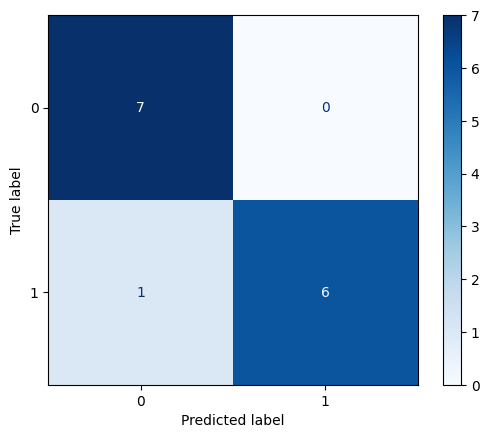

In [29]:
cm = confusion_matrix(y_val, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

In [30]:
score = f1_score(y_val, y_pred, average='macro')
with open(os.path.join(SAVE_PATH, fr"limit-model-f1-{score:2f}.pkl"), "wb") as fout:
    pickle.dump(model, fout)
print(f"Saved limit-model.pkl")

Saved limit-model.pkl


## Best Overall Multi-Label Model

### Leak - Byte Frequency

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
FEATURE_PATH = os.path.join(DATA_PATH, 'byte_freq')

#### Load Data

In [33]:
df = pd.read_csv(os.path.join(FEATURE_PATH, 'dataset.csv')).set_index('address')

with open(os.path.join(FEATURE_PATH, 'features.json'), "r") as f:
    features = json.load(f)

with open(os.path.join(FEATURE_PATH, 'labels.json'), "r") as f:
    labels = json.load(f)

In [34]:
X = df[features]
y = df[labels]

In [35]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

### MLP

#### Build model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import MeanSquaredError

2025-07-16 01:06:54.148598: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
def Model(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(512, kernel_regularizer=regularizers.l1_l2(1e-6)),
        BatchNormalization(),
        LeakyReLU(0.01),
        Dropout(0.4),

        Dense(256, kernel_regularizer=regularizers.l1_l2(1e-6)),
        BatchNormalization(),
        LeakyReLU(0.01),
        Dropout(0.3),

        Dense(128, kernel_regularizer=regularizers.l1_l2(1e-6)),
        BatchNormalization(),
        LeakyReLU(0.01),
        Dropout(0.2),

        Dense(output_dim, activation='sigmoid')  # sigmoid for multi-label
    ])

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=1e-6),
        metrics=['accuracy']
    )
    return model

In [38]:
model = Model(input_dim=X.shape[1], output_dim=y.shape[1])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 299,779 (1.14 MB)

 Trainable params: 297,987 (1.14 MB)

 Non-trainable params: 1,792 (7.00 KB)

#### Train

In [39]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,
                    callbacks=[
                                EarlyStopping(monitor='val_loss',
                                             patience=5,
                                             restore_best_weights=True),
                                ReduceLROnPlateau(
                                  monitor='val_loss',
                                  factor=0.5,
                                  patience=5,
                                  verbose=1)
                               ]
                    )

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step - accuracy: 0.3769 - loss: 0.8608 - val_accuracy: 0.2727 - val_loss: 1.9958 - learning_rate: 1.0000e-06
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3570 - loss: 0.8383 - val_accuracy: 0.3636 - val_loss: 1.4967 - learning_rate: 1.0000e-06
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5000 - loss: 0.8817 - val_accuracy: 0.2727 - val_loss: 1.3507 - learning_rate: 1.0000e-06
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3873 - loss: 0.8893 - val_accuracy: 0.2727 - val_loss: 1.2449 - learning_rate: 1.0000e-06
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2443 - loss: 0.8263 - val_accuracy: 0.2727 - val_loss: 1.1711 - learning_rate: 1.0000e-06
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4337 - loss: 0.9140 - val_accuracy: 0.2727 - val_loss: 1.1081 - learning_rate: 1.0000e-06
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3419 - loss

#### Predict

In [40]:
y_test_prob = model.predict(X_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


In [41]:
def tune_thresholds(y_true, y_pred_prob, metric='f1'):
    y_true = np.asarray(y_true)          # Fix: convert to NumPy
    y_pred_prob = np.asarray(y_pred_prob)

    best_thresholds = []
    best_scores = []

    for i in range(y_true.shape[1]):
        label_true = y_true[:, i]
        label_probs = y_pred_prob[:, i]  # Fix here too

        thresholds = np.linspace(0.0, 1.0, 101)
        scores = []

        for t in thresholds:
            label_pred = (label_probs >= t).astype(int)
            if metric == 'f1':
                score = f1_score(label_true, label_pred, zero_division=0)
            scores.append(score)

        best_t = thresholds[np.argmax(scores)]
        best_score = np.max(scores)

        best_thresholds.append(best_t)
        best_scores.append(best_score)

        print(f"Label {i}: Best threshold = {best_t:.2f}, Best {metric} = {best_score:.4f}")

    return best_thresholds, best_scores


In [42]:
best_thresholds, _ = tune_thresholds(y_val, y_test_prob)

Label 0: Best threshold = 0.16, Best f1 = 0.6316
Label 1: Best threshold = 0.68, Best f1 = 0.8000
Label 2: Best threshold = 0.00, Best f1 = 0.7826


In [43]:
y_pred = (model.predict(X_val) >= best_thresholds).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


#### Report

In [44]:
def display_multilabel_confusion_matrix(y_test, y_pred):
    # Ensure y_test and y_pred are binary numeric arrays
    y_test_array = np.array(y_test, dtype=int)
    y_pred_array = np.array(y_pred, dtype=int)

    # Generate multi-label confusion matrix again using numeric arrays
    conf_matrices_fixed = multilabel_confusion_matrix(y_test_array, y_pred_array)

    # Plot each confusion matrix again to confirm it's fixed
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    for i, (cm, label) in enumerate(zip(conf_matrices_fixed, y.columns)):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix: {label}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.show()

In [45]:
print(classification_report(y_val, y_pred, target_names=y.columns))

              precision    recall  f1-score   support

        mint       0.46      1.00      0.63         6
        leak       1.00      0.67      0.80         3
       limit       0.64      1.00      0.78         9

   micro avg       0.59      0.94      0.72        18
   macro avg       0.70      0.89      0.74        18
weighted avg       0.64      0.94      0.74        18
 samples avg       0.58      0.69      0.61        18



/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


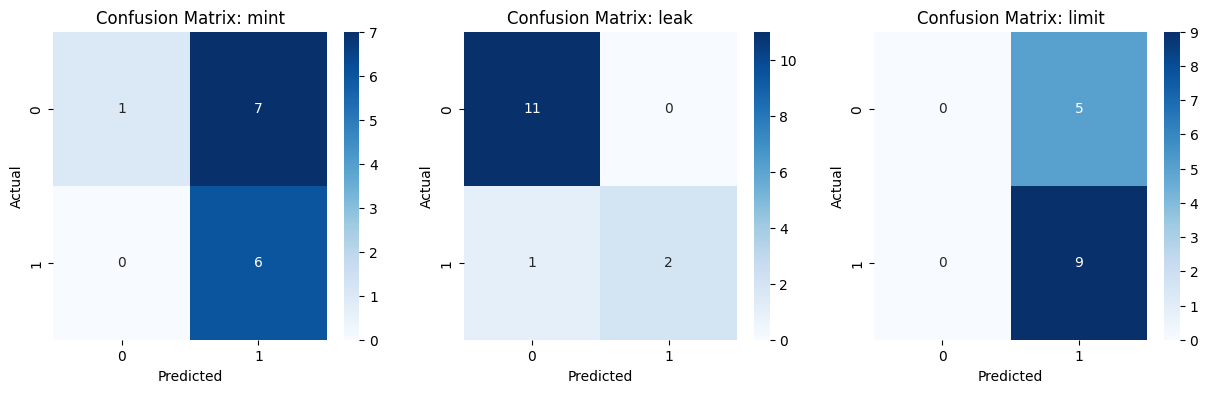

In [46]:
display_multilabel_confusion_matrix(y_val, y_pred)

#### Save Model

In [47]:
score = f1_score(y_val, y_pred, average='macro')
name = f"mlp-f1-{score:2f}"
model.save(os.path.join(SAVE_PATH, f'{name}.keras'))

# Save thresholds
with open(os.path.join(SAVE_PATH,f"best_thresholds_for_{name}.json"), "w") as f:
    json.dump({
        "thresholds": best_thresholds,
    }, f)

print(f'Saved {name}')

Saved mlp-f1-0.738063
